# 📊 Student Performance Data Analysis

Student Performance Data sourced from Kaggle via https://www.kaggle.com/datasets/nabeelqureshitiii/student-performance-dataset

## 📌 Task 1: Load and Explore the Dataset

In [17]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots to look nice
sns.set(style='whitegrid')

In [2]:
# Loading the dataset
try:
    df = pd.read_csv('dataset/student_performance.csv')
    print('✅ Dataset loaded successfully!')
except FileNotFoundError:
    print('❌ File not found. Please check the path.')
except Exception as e:
    print(f'❌ An error occurred: {e}')

✅ Dataset loaded successfully!


In [3]:
# Display dataset head
df.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [4]:
# General Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [9]:
# check for missing values
print('\nMissing values per column:')

df.isnull().sum()

# ✅ No missing values found — dataset is clean!


Missing values per column:


student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64

## 🎯 Task 2: Basic Data Analysis

In [10]:
# Basic statistics of numerical column
df.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278932,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


In [ ]:
# Compute Median of numerical columns
df.median(numeric_only=True) # same as 50% row of the describe

student_id                 500000.5
weekly_self_study_hours        15.0
attendance_percentage          85.0
class_participation             6.0
total_score                    87.5
dtype: float64

In [14]:
# Group by a Categorical column such as grade
print('\nThis presents how the mean of weekly_self_study_hours impact student grades')

df.groupby('grade')['weekly_self_study_hours'].mean()


This presents how the mean of weekly_self_study_hours impact student grades


grade
A    19.375738
B    12.115533
C     7.691161
D     3.764143
F     1.524662
Name: weekly_self_study_hours, dtype: float64

In [16]:
# Group by a Categorical column such as grade
print('\nThis presents how the mean of total_score impact student grades')

df.groupby('grade')['total_score'].mean()


This presents how the mean of total_score impact student grades


grade
A    96.042375
B    77.946590
C    63.564524
D    49.380346
F    35.474146
Name: total_score, dtype: float64

## 🎯 Task 3: Data Visualization

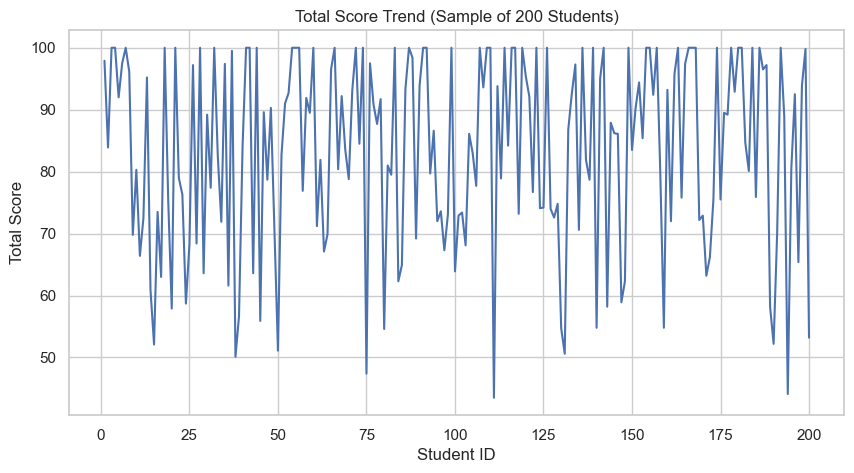

In [18]:
# Line Chart to display trends in dataset
plt.figure(figsize=(10,5))
plt.plot(df['student_id'].head(200), df['total_score'].head(200)) # sampling 200 students for clarity
plt.title('Total Score Trend (Sample of 200 Students)')
plt.xlabel('Student ID')
plt.ylabel('Total Score')
plt.show()

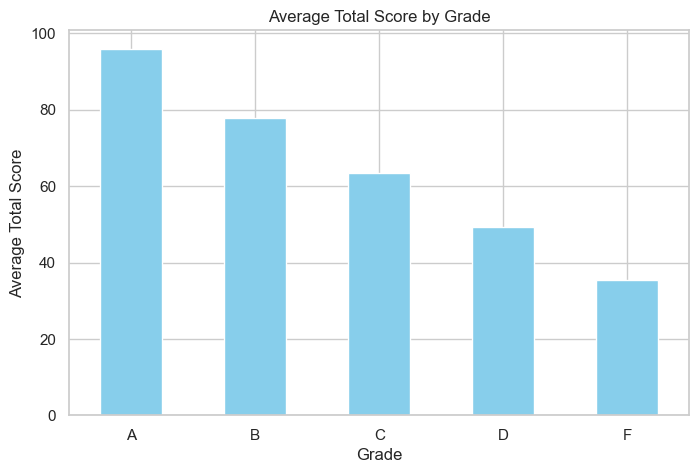

In [21]:
# Bar chart for Comparisons across categories
avg_scores = df.groupby('grade')['total_score'].mean()
avg_scores.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('Average Total Score by Grade')
plt.xlabel('Grade')
plt.xticks(rotation=0)
plt.ylabel('Average Total Score')
plt.show()

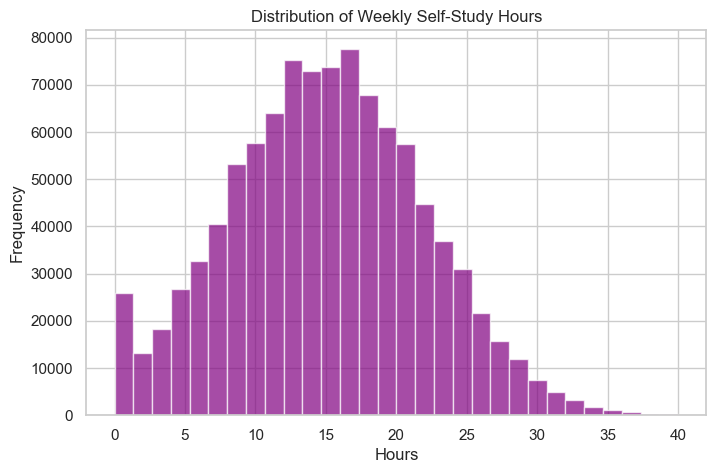

In [22]:
# Histogram Distribution of weekly_self_study_hours 
plt.figure(figsize=(8,5))
plt.hist(df['weekly_self_study_hours'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Weekly Self-Study Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

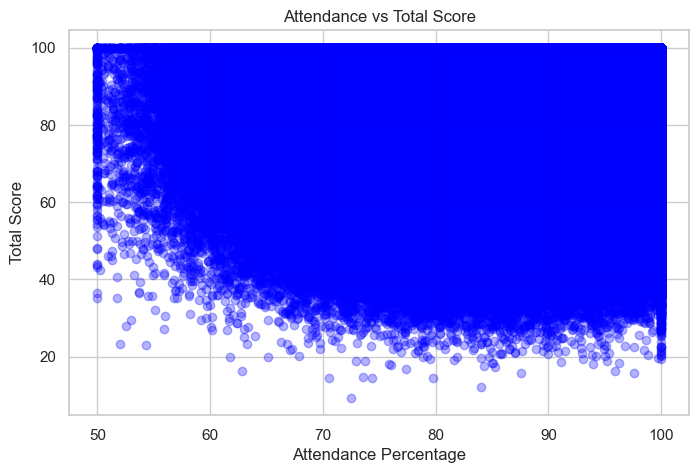

In [25]:
# Scatter Plot showing relationship between attendance_percentage and total_score
plt.figure(figsize=(8,5))
plt.scatter(df['attendance_percentage'], df['total_score'], alpha=0.3, color='blue')
plt.title('Attendance vs Total Score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Total Score')
plt.show()